# Art des Visa

Im folgenden wollen wir einen genaueren Blick auf die verscheidenen Visaarten werfen.
Ebenfalls wollen wir herausfinden, welche Visaarten von den verschiedenen Ländern ausgehend überwiegend genutzt wird.

Die benötigten Informationen finden sich in den Spalten `class_of_admission` und `country_of_citizenship`

In [1]:
import cleanup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import modules
plt.style.use('../own_style.mplstyle')

In [2]:
# cleanup.generate_cleaned_df()

In [3]:
col_list = ["class_of_admission", "country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

<AxesSubplot:title={'center':'Number of Visa Applications by Class of admission'}, xlabel='Class of admission', ylabel='Number of Visa Applications'>

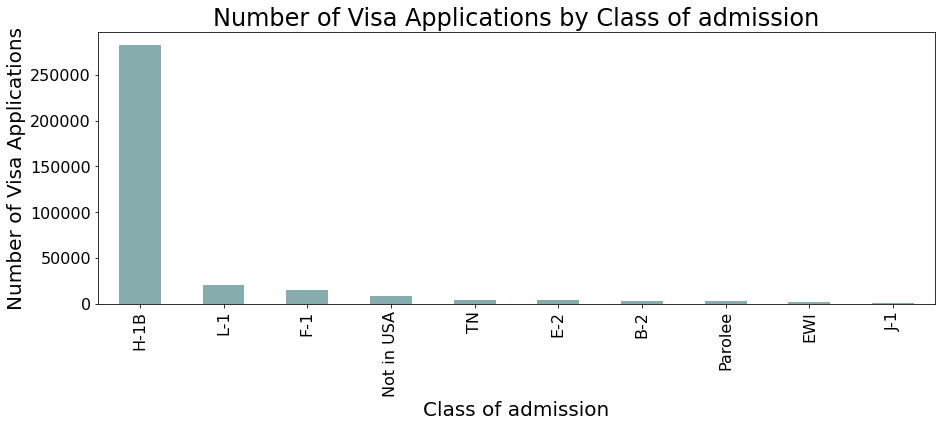

In [4]:
visas_df["class_of_admission"].value_counts()[:10].plot(kind="bar", xlabel="Class of admission", ylabel = "Number of Visa Applications", title = "Number of Visa Applications by Class of admission", figsize = [15,5])

Die Visaart H-1B macht einen Großteil der eingehenden Visaanträge aus.
Wie sieht es im Verhältnis zu den anderen Visaarten prozentual aus?

Dafür berechnen wir zuerst den prozentualen Anteil aus und kumulieren diesen anschließend für die nachfolgende Grafik.

In [5]:
graph_df = visas_df["class_of_admission"].value_counts(normalize=True).to_frame()
graph_df["cumsum"] = graph_df["class_of_admission"].cumsum()

In [6]:
graph_df = graph_df.rename(columns={"class_of_admission": "percentage", "percentage_cumsum": "application_count"})

In [7]:
tmp = visas_df["class_of_admission"].value_counts().to_frame()
tmp = tmp.rename(columns={"class_of_admission": "values"})

In [8]:
graph_df = graph_df.merge(tmp, how="outer", left_index=True, right_index=True)
del tmp

In [9]:
graph_df.head(5)

,percentage,cumsum,values
H-1B,0.805133,0.805133,283018
L-1,0.056720,0.861853,19938
F-1,0.042519,0.904372,14946
Not in USA,0.024431,0.928803,8588
TN,0.012133,0.940936,4265


In [10]:
graph_df = graph_df[:10]
values_coz = graph_df['values']
values_cumsum = graph_df['cumsum']

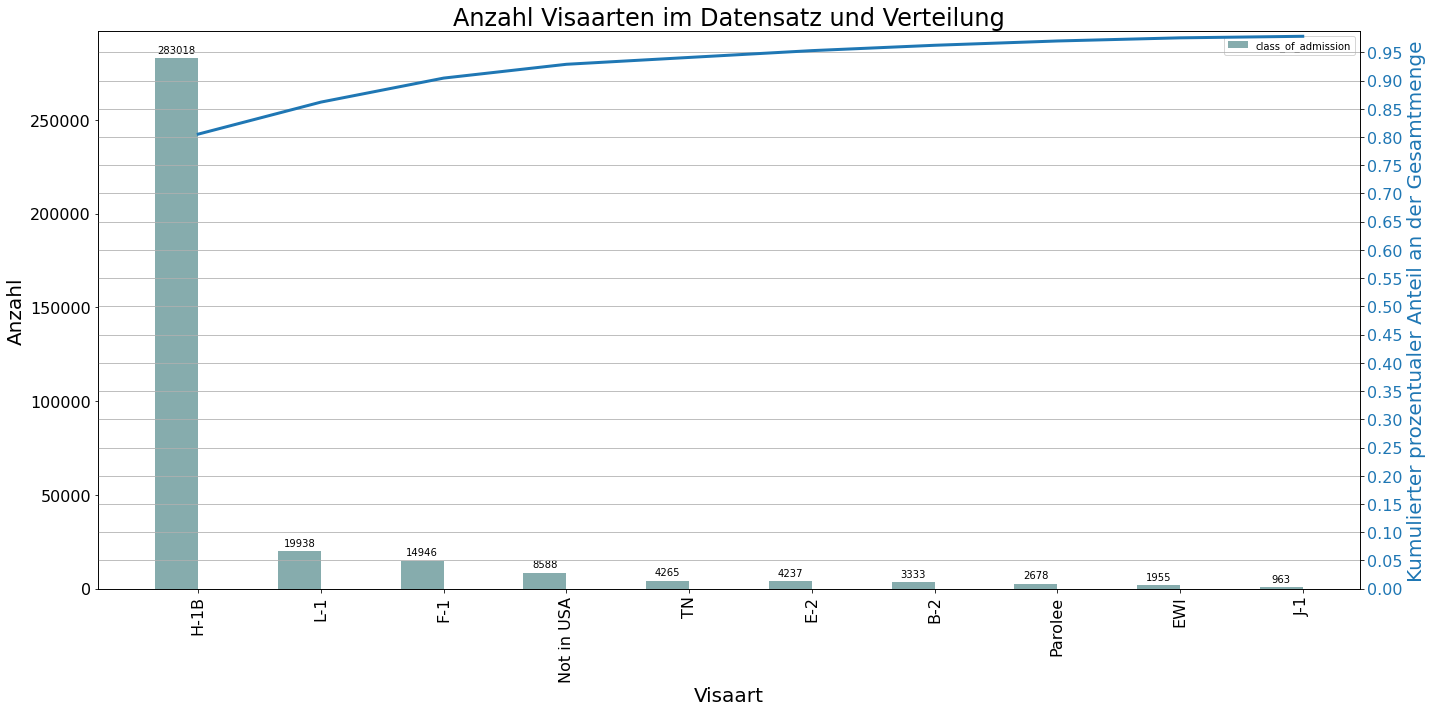

In [11]:
labels = graph_df.index


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax  = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, values_coz, width, label='class_of_admission')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Anzahl')
ax.set_title('Anzahl Visaarten im Datensatz und Verteilung')
ax.set_xlabel('Visaart')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.legend()

ax2 = ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('Kumulierter prozentualer Anteil an der Gesamtmenge', color=color)  # we already handled the x-label with ax1
ax2.plot(x, values_cumsum, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(ymin=0)
ax2.set_yticks(np.arange(0, 1, step=0.05))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()
plt.grid()
plt.show()

Die Visaart H-1B macht über 80% aller eingehenden Visaanträge aus.
Allein die drei am meisten Vorkommenden Visaarten repräsentieren über 90% aller Visaanträge.

Für was stehen aber diese drei Visaarten?

- H1-B: Eine vom Arbeitsministerium (Department of Labor, DOL) ausgestellte permanente Arbeitsbescheinigung erlaubt es einem Arbeitgeber, einen ausländischen Arbeitnehmer einzustellen. Der Ausländer muss speziell in einem Bereich arbeiten, der spezielle Kenntnisse erfordert, für die der Arbeitgeber keinen in den USA ansässigen Arbeitnehmer finden kann.
- L1: Arbeit in einer Zweigstelle, Muttergesellschaft, Tochtergesellschaft oder Niederlassung des aktuellen Arbeitgebers. Die Person muss innerhalb der letzten drei Jahre ununterbrochen für 1 Jahr bei demselben Arbeitgeber im Ausland beschäftigt gewesen sein.​
- F1: Studenten Visa/Schüleraustausch

Es ist festzuhalten, dass die USA das Visaverfahren hauptsächlich dafür nutzt, Fachkräfte für sich zu gewinnen.

Nachfolgend soll noch ein kurzer Blick auf die gewählten Visaarten je Land geworfen werden.
Dafür nutzen wir die selbstgeschriebene Funktion `invokes_influenced_is_influenced_by_stacked_bar_chart`.

Es werden die drei am meisten vorkommenden Visaarten heerausgefiltert, und anschließend werden die Werte je Land normalisiert dargestellt.

Siehe modules.py

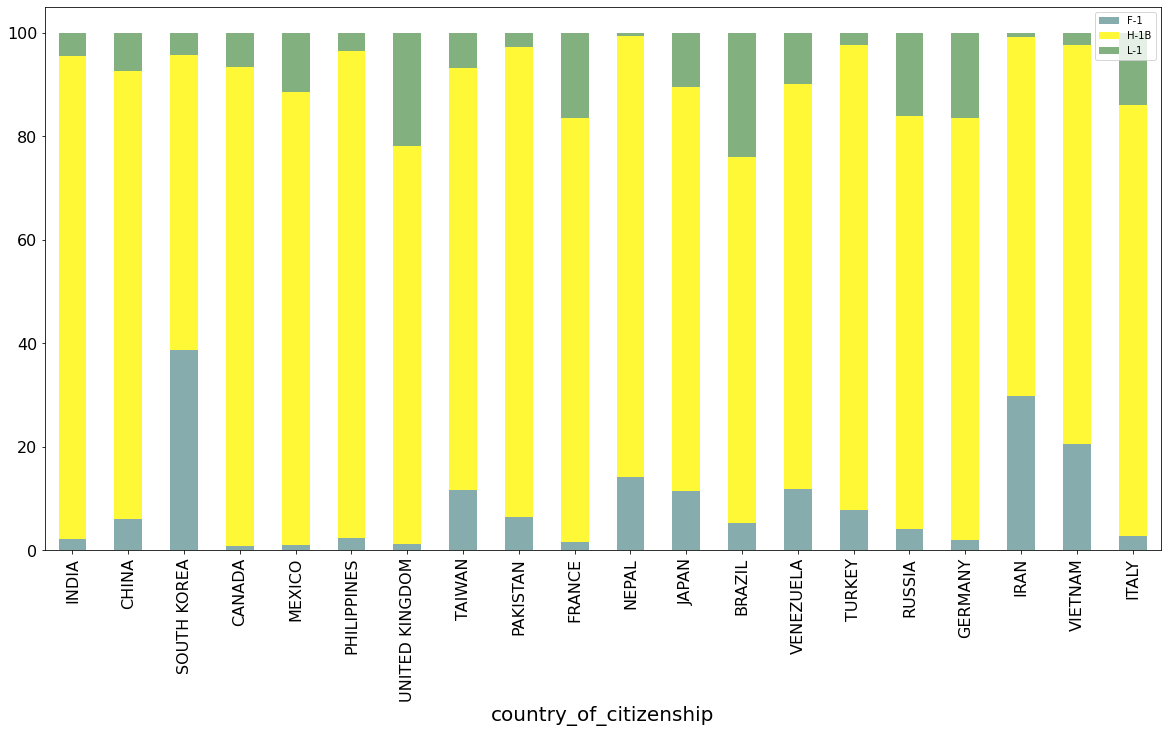

In [12]:
modules.invokes_influenced_is_influenced_by_stacked_bar_chart(visas_df, "country_of_citizenship", "class_of_admission", 20, 3)

Es sind gewisse Ausschläge im vorliegenden Graphen zu verzeichnen:
- Südkorea, Taiwan, Iran und Vietnam scheinen verhältnismäßig besonders viele studentische Auslandssemester in Anspruch zu nehmen.
- Aus Ländern wie das Vereinigte Königreich, Frankreich, Brasilien, Russland, Deutschland und Italien scheinen dagegen verhältnismäßig oft das L-1 Visa genutzt zu werden, um Arbeitnehmer innerhalb des selben Unternehmens in die USA zu versetzen.

Werfen wir im folgenden einen genaueren Blick auf die F-1 Visas (Studenten Visa/Schüleraustausch):

In [14]:
visas_df[visas_df["class_of_admission"]=="F-1"]["country_of_citizenship"].value_counts()[:10]

SOUTH KOREA    4421
INDIA          4261
CHINA          1516
TAIWAN          430
IRAN            414
NEPAL           396
JAPAN           249
VENEZUELA       215
PAKISTAN        195
VIETNAM         175
Name: country_of_citizenship, dtype: int64

Tatsächlich steht Südkorea auch in absoluten Werten an der Spitze der Rangliste der F-1 Visas.

Überprüft man die Werte allerdings im Internet wird schnell ersichtlich, dass eigentlich China mit großem Abstand an der Spitze der F-1 Visas steht.
Siehe: https://monitor.icef.com/2018/03/us-f-1-visas-down-nearly-17-in-2017/

<img src="https://monitor.icef.com/wp-content/uploads/2018/03/US-visasbycountry-600x494.jpg" alt="F-1 visas issued to students of top source countries, 2010–2017" width="500"/>

Dies ist wahrscheinlich einem unvollständigen Datensatz zuzuordnen.
